# Climate Change Analysis

In [2]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

# Data from NASA for Climate Change Aanlysis Of 50 Years

In [3]:
# import dataset
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

# Scatterplot 

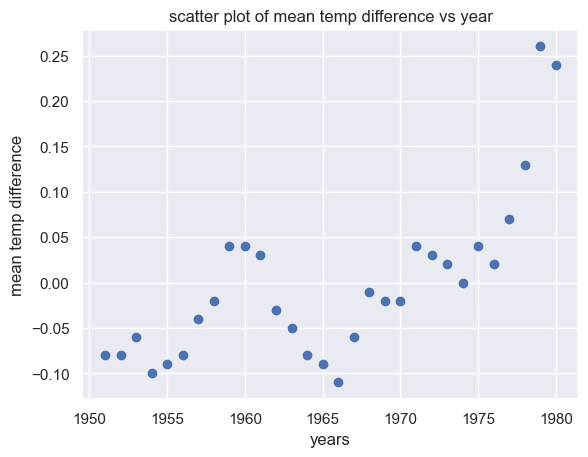

In [4]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Insights:
The data set uses a 30-year mean between 1951 and 1980 to calculate a base temperature for that period, and then uses 5-year mean temperatures to calculate the difference between the 5-year mean and the 30-year mean for each year. The scatter plot shows the annual temperature differences.

# Linear Regression with Numpy
To overlay the scatter plot with a trend line showing how the data is trending over time is called Linear Regression.


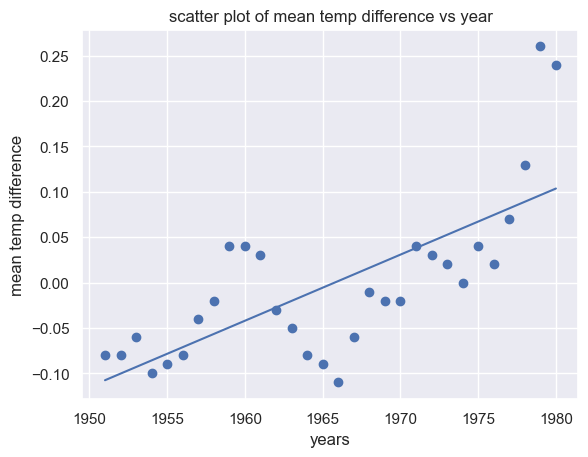

 y = 0.007279199110122222 * x + -14.309265850945224


In [5]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates a line plot using the function 
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

# Insights 
From the regression line, you can see that the difference between 30-year mean temperatures and 5-year mean temperatures is increasing over time. Most of the computational work required to generate the regression line was done by NumPy's polyfit function, which computed the values of m and b in the equation y = mx + b.

# Linear Regression with Scikit Learn 


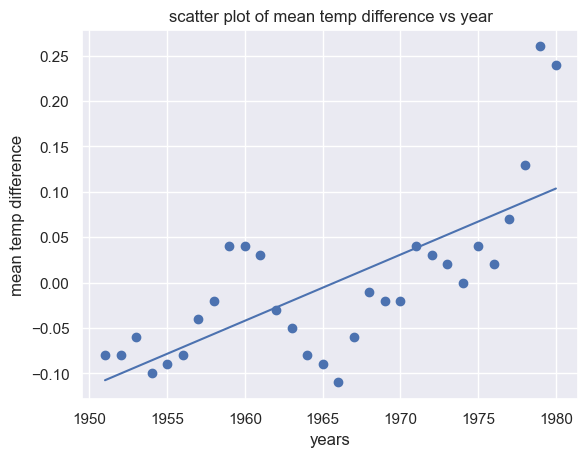

 y = 0.007279199110122355 * x + -14.30926585094549


In [6]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot 
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

# Insights
scikit-learn supports many different types of regression, which is used in building sophisticated machine-learning models.

# Seaborn 
It is a library for statistical visualization, to plot the second of the two data sets, which covers the years 1882 to 2014. Seaborn can create a regression line accompanied by a projection showing where data points should fall based on the regression with one simple function call.

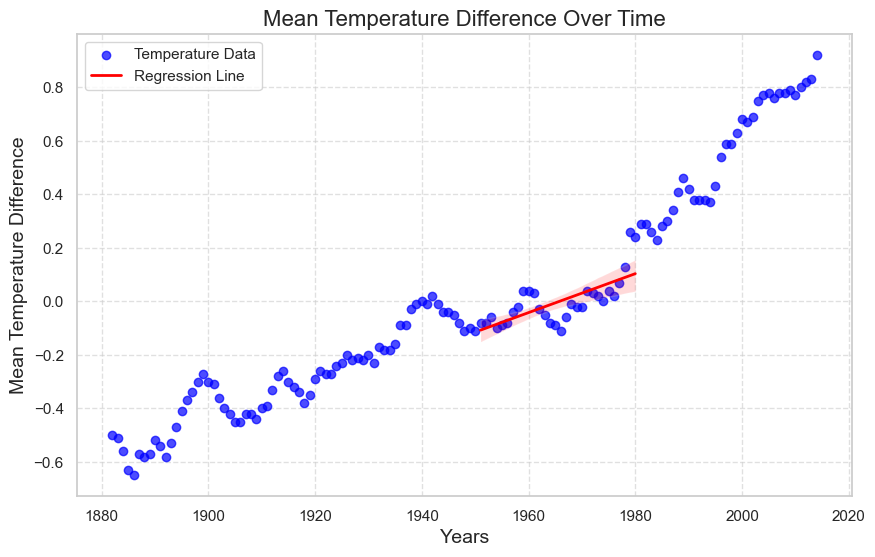

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot (optional)
sns.set_style("whitegrid")

# Create a figure and axes for better layout control
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
plt.scatter(years, mean, label='Temperature Data', color='blue', alpha=0.7)

# Regression line
sns.regplot(x=yearsBase, y=meanBase, scatter=False, color='red', line_kws={"linewidth": 2}, label='Regression Line')

# Title and labels
plt.title('Mean Temperature Difference Over Time', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Mean Temperature Difference', fontsize=14)

# Legend
plt.legend()

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()



# Analysis Insights :
- Scatter Points (Blue Dots): Each blue dot represents a year and shows how much the Earth's average temperature differed from a reference point in that year. If a dot is higher on the plot, it means that year was hotter than the reference, and if it's lower, it was cooler.

- Red Line (Regression Line): The red line is like a trendline. It shows the overall pattern in the data. If the line slopes upward, it means that, on average, temperatures have been increasing over the years. If it slopes downward, it means temperatures have been decreasing. If it's relatively flat, it suggests temperatures have remained stable.

- Comparison of Actual vs. Predicted Values: I also compared the actual temperature values (the blue dots) with the predicted values generated using Seaborn's regression analysis (the red line). This helps understand how well the regression model fits the actual data.

- Observation of the Data: The data points for the first 100 years of the plot seem to match the predicted values closely. In other words, the red line and the blue dots align well during this period. However, from approximately 1980 onward, the actual data points start to deviate from the predicted values. This means that the model represented by the red line is less accurate in predicting temperatures during this period.

- Significance of the Deviation: The fact that the data points from 1980 onward don't follow the predicted values as closely is significant. It suggests that something has changed in the more recent years. The deviation from the predicted values in recent times is an indicator that climate change may be accelerating. These models are used to analyze and understand the changing nature of climate data, helping us recognize trends and patterns that are crucial for addressing climate-related challenges.

In summary, this plot not only helps us see the general temperature trends over the years but also highlights the importance of tracking changes in recent times, which can have significant implications for understanding of climate change and the need for action.